# < 28. 정보이론 톺아보기 >

## 학습내용
1. Information Content
2. Entropy
3. Kullback Leibler Divergence
4. Cross Entropy Loss
5. Decision Tree와 Entropy

---

## 28.2 Information Content
- 정보이론이란 추상적인 '정보'라는 개념을 정량화하고 정보의 저장과 통신을 연구하는 분야

### Information Content

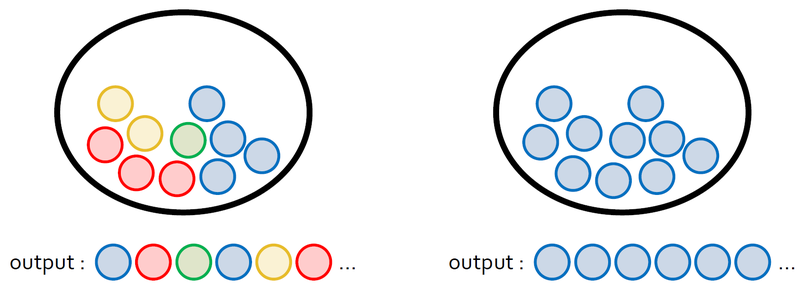

파란색 공 999개와 빨간색 공 1개가 들어 있는 주머니가 있다고 합시다. 어떤 사람이 공을 하나 꺼내고 다시 넣는 실험을 반복합니다. 이 사람은 주머니에 어떤 색깔의 공이 몇 개씩 들어 있는지 모르기 때문에, 공을 하나씩 뽑을 때마다 이 사람이 추측하는 확률 분포가 업데이트됩니다. 파란색 공을 처음 몇 번 뽑았을 때, 파란색 공을 뽑는 사건은 정보량이 높습니다. 하지만 파란색 공만 수십, 수백 번 뽑고 나서는 파란색 공을 뽑는 사건은 확률이 1에 가깝기 때문에 큰 의미를 주지 못합니다. 그러다가 만약에 하나 있는 빨간색 공을 뽑는다면, 이 사건은 정보량이 엄청나게 높을 것입니다. 빨간색 공을 뽑기 전까지 관찰된 파란색 공의 수가 많을수록(즉 빨간색 공이 뽑힐 확률이 낮을수록) 빨간색 공을 뽑는 사건의 정보량은 높아집니다.

- 정보를 정량적으로 표현하기 위해 필요한 세 가지 조건
    1. 일어날 가능성이 높은 사건은 정보량이 낮고, 반드시 일어나는 사건에는 정보가 없는 것이나 마찬가지입니다.
    2. <mark>일어날 가능성이 낮은 사건은 정보량이 높습니다.</mark>
    3. 두 개의 독립적인 사건이 있을 때, 전체 정보량은 각각의 정보량을 더한 것과 같습니다.

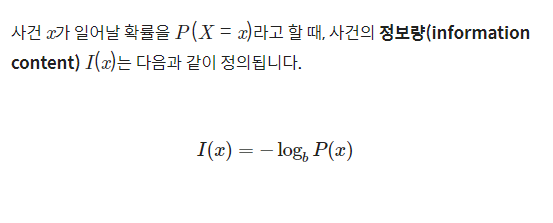

In [3]:
import numpy as np
import math
import random

# 주머니 속에 들어있는 공의 개수입니다. 숫자를 바꾸면서 실험해보세요!
total = 10000

#---------------#

count = 1   # 실험이 끝날 때까지 꺼낸 공의 개수

# 1부터 total까지의 정수 중에서 하나를 뽑고 total과 같으면 실험 종료
# total=1000인 경우 1~999: blue / 1000: red
while True:
    sample = random.randrange(1,total+1)
    if sample == total:
        break
    count += 1

print('number of blue samples: '+str(count-1))
print('information content: '+str(-math.log(1/count)))

number of blue samples: 495
information content: 6.206575926724928


---

## 28.3 Entropy

정보량은 한 가지 사건에 대한 값입니다. 예를 들면 주사위를 던졌을 때 1이 나오는 사건, 여러 색깔의 공이 들어 있는 주머니에서 빨간색 공을 꺼내는 사건 등이죠. 그러면 여러 가지 경우의 수가 존재하는 실험의 정보량도 구할 수 있을까요? 직관적으로 확률 변수가 가지는 모든 경우의 수에 대해 정보량을 구하고 평균을 내면 확률 변수의 평균적인 정보량을 구할 수 있을 것입니다. 특정 확률분포를 따르는 사건들의 정보량 기댓값을 <mark>엔트로피(entropy)라고 합니다

### For Discrete Random Variables


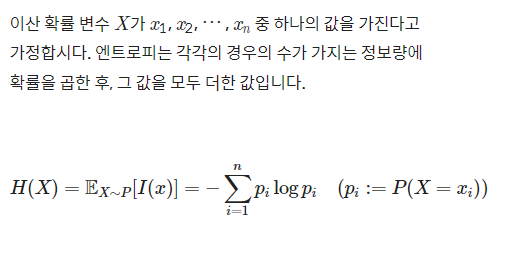

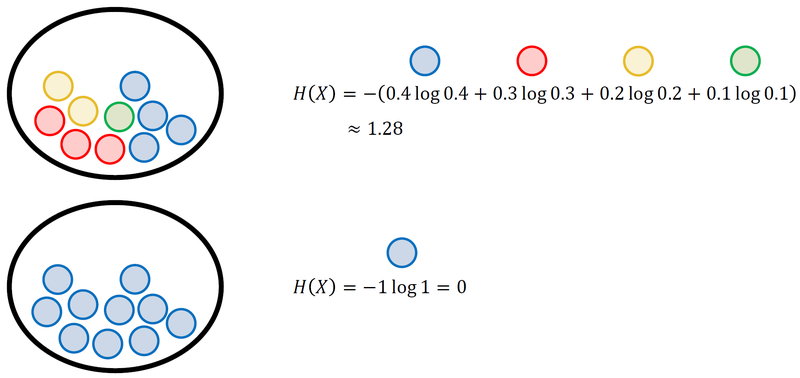

위 그림은 여러 개의 공이 들어 있는 주머니에서 공을 꺼낼 때 각각의 엔트로피 값을 계산한 예제입니다. 여러 가지 색깔의 공이 들어있을 때 엔트로피가 높고, 같은 색깔의 공이 많이 들어있을 때 엔트로피가 낮습니다. 이러한 사실은 엔트로피의 직관적인 개념인 무질서도 또는 불확실성 과도 비슷합니다.

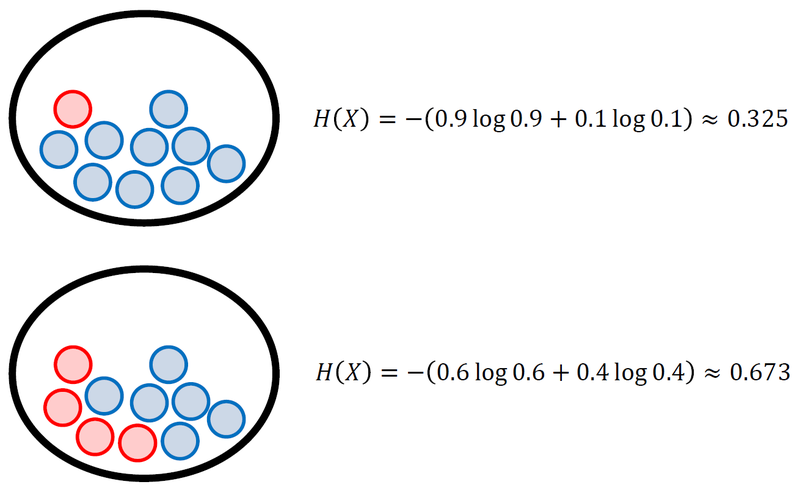

이번에는 공의 색깔을 2가지로 고정시키고, 두 색깔의 비율만 조절해 보겠습니다. 파란색 공 9개, 빨간색 공 1개가 들어 있는 경우는 엔트로피가 약 0.325입니다. 각각 6개, 4개가 들어 있는 경우는 엔트로피가 약 0.673이 나옵니다. 확률 변수가 가질 수 있는 값의 가짓수가 같을 때(여기에서는 빨간색/파란색), 사건들의 확률이 균등할수록 엔트로피 값은 증가합니다.

아래 그림은 동전을 던질 때 앞면이 나올 확률에 따른 엔트로피를 나타낸 그래프입니다. 앞면이 나올 확률이 0.5일 때(앞면과 뒷면의 확률이 각각 0.5로 같은 <mark>균등 분포(uniform distribution)) 엔트로피 값이 최대</mark>가 됩니다. 앞면이 나올 확률이 90%인 동전을 던질 때보다 앞면과 뒷면의 확률이 같은 동전을 던질 때 결과를 예측하기가 더 어렵기 때문에 불확실성이 크다고 할 수 있겠죠.

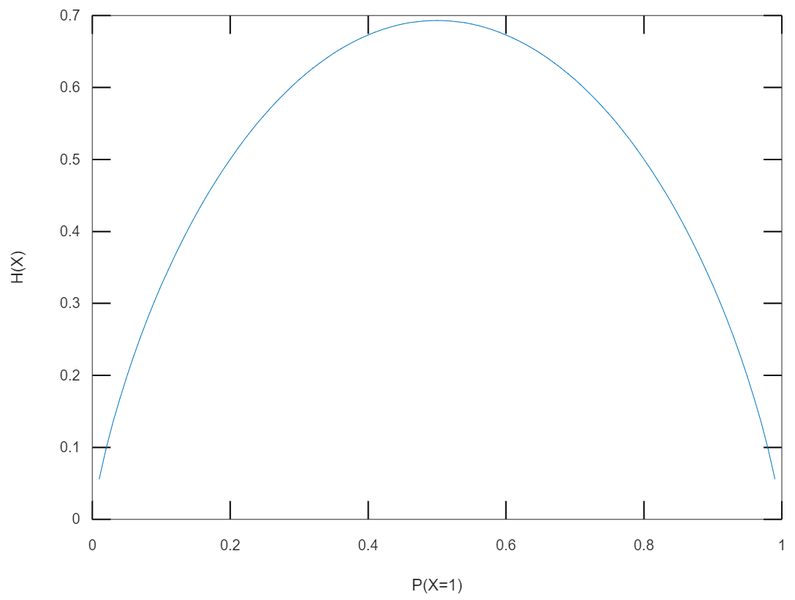

### For Continuous Random Variables

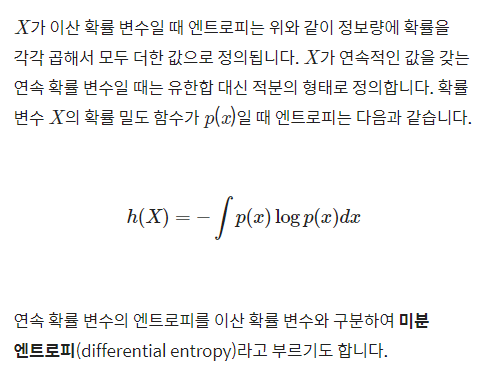

---

## 28.4 Kullback Leibler Divergence

머신러닝의 목표는 새로운 입력 데이터가 들어와도 예측이 잘 되도록, 모델의 확률 분포를 데이터의 실제 확률 분포에 가깝게 만드는 것입니다. 머신 러닝 모델은 크게 두 가지가 있습니다. 우선 결정 모델(discriminative model)은 데이터의 실제 분포를 모델링 하지 않고 결정 경계(decision boundary)만을 학습합니다. 예를 들면 모델의 결괏값이 0보다 작을 경우 데이터를 1번 클래스로 분류하고, 0보다 클 경우 2번 클래스로 분류하는 식이죠. 반면에 생성 모델(generative model)은 데이터와 모델로부터 도출할 수 있는 여러 확률 분포와 베이즈 이론을 이용해서 데이터의 실제 분포를 간접적으로 모델링 합니다. 그렇기 때문에 생성 모델을 학습시킬 때는 두 확률 분포의 차이를 나타내는 지표가 필요한데, 대표적인 예가 <mark>쿨백-라이블러 발산(Kullback-Leibler divergence, KL divergence)입니다.

데이터가 따르는 실제 확률 분포를 P(x), 모델이 나타내는 확률 분포를 Q(x)라고 합시다. 두 확률 분포의 KL divergence는 P(x)를 기준으로 계산된 Q(x)의 평균 정보량과, P(x)를 기준으로 계산된 P(x)의 평균 정보량의 차이로 정의할 수 있습니다. 실제 확률 분포 P(x) 대신 근사적인 분포 Q(x)를 사용했을 때 발생하는 엔트로피의 변화량을 나타내는 값입니다.

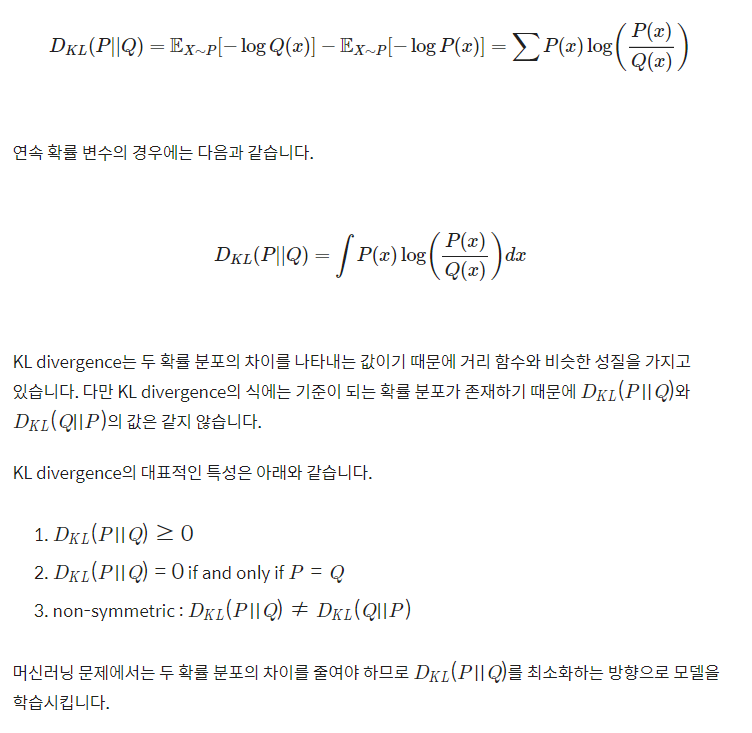

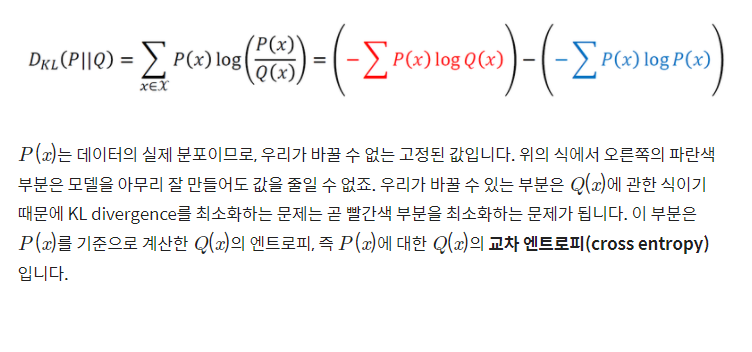

### Cross Entropy

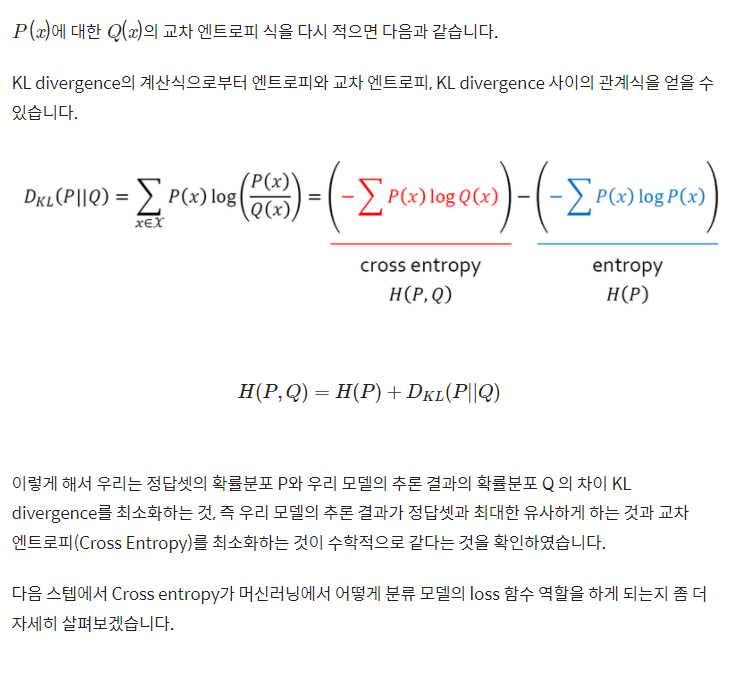

---

## 28.5 Cross Entropy Loss

### Cross Entropy Loss

머신러닝에서 모델이 나타내는 확률 분포와 데이터가 따르는 실제 확률 분포 사이의 차이를 나타내는 함수를 <mark>손실 함수(loss function)</mark>라고 합니다. 모델의 확률 분포는 파라미터에 따라 달라지기 때문에 손실 함수 역시 파라미터에 의해 결정됩니다. likelihood 노드에서 잠깐 다루었던 최소제곱법의 함수도 손실 함수라고 할 수 있죠. 데이터가 연속적인 값을 가지는 회귀(regression) 문제와는 다르게, 이산적인 값을 가지는 분류(classification) 문제에서는 모델의 출력 결과가 로지스틱 함수(logistic function)로 표현됩니다. 분류 클래스가 2개인 로지스틱 함수를 클래스가 nn개일 때로 확장한 것이 딥러닝에서도 자주 사용되는 소프트맥스 함수(softmax function)입니다. 이 함수와 데이터의 확률 분포의 차이가 분류 문제의 손실 함수가 됩니다.

앞에서 KL divergence를 최소화하는 것이 cross entropy를 최소화하는 것과 같다는 이야기를 했습니다. cross entropy 또한 손실 함수의 한 종류입니다. cross entropy의 식을 다시 살펴봅시다.

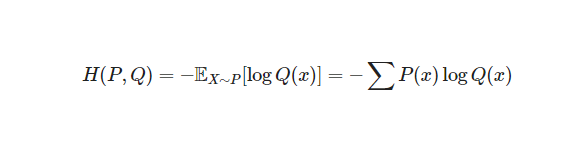

분류 문제에서 데이터의 라벨은 one-hot encoding을 통해 표현됩니다. 클래스의 종류가 N가지이고 특정 데이터가 n번째 클래스에 속할 때, n번째 원소만 1이고 나머지는 0으로 채운 N차원 벡터로 놓는 것이죠. 입력 데이터의 특성(feature) 값이 모델을 통과하면 출력 레이어의 소프트맥스 함수에 의해서 각각의 클래스에 속할 확률이 계산됩니다. 이 확률 값들이 모델이 추정한 확률 분포 Q(x)를 구성하는 값들입니다. 3개의 클래스 c_1,c_2,c_3
 가 존재하는 분류 문제에서 어떤 데이터의 출력값이 다음과 같다고 가정합시다.

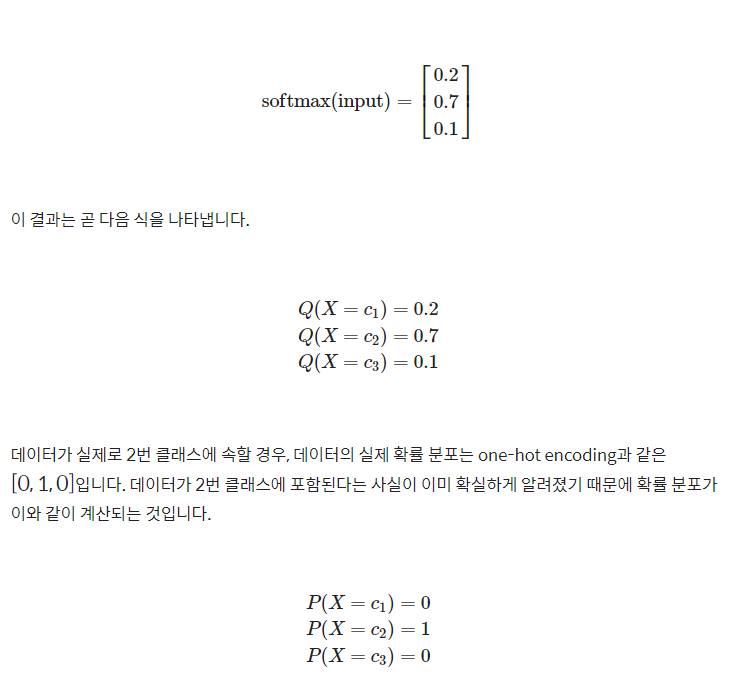

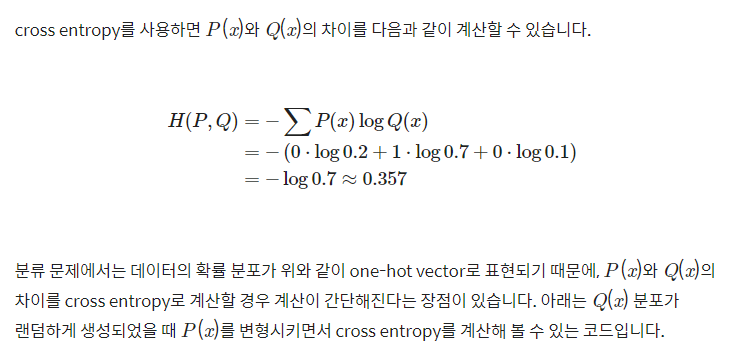

In [4]:
import numpy as np
import random

# generate random output
#-----------------#
# can be modified
class_num = 4
#-----------------#
q_vector = []
total = 1

for i in range(class_num-1):
    q = random.uniform(0,total)
    q_vector.append(round(q,3))
    total = total - q

q_vector.append(total)
softmax_output = np.array(q_vector)

print(softmax_output)

[0.593      0.262      0.092      0.05277302]


In [5]:
#-----------------#
# can be modified
class_index = 1
#-----------------#

p_vector = np.zeros(class_num)
p_vector[class_index-1] = 1

cross_entropy = -np.sum(np.multiply(p_vector, np.log(softmax_output)))

print('model prediction: '+str(softmax_output))
print('data label: '+str(p_vector))
print('cross entropy: '+str(round(cross_entropy,4)))

model prediction: [0.593      0.262      0.092      0.05277302]
data label: [1. 0. 0. 0.]
cross entropy: 0.5226


### Cross Entropy와 Likelihood의 관계

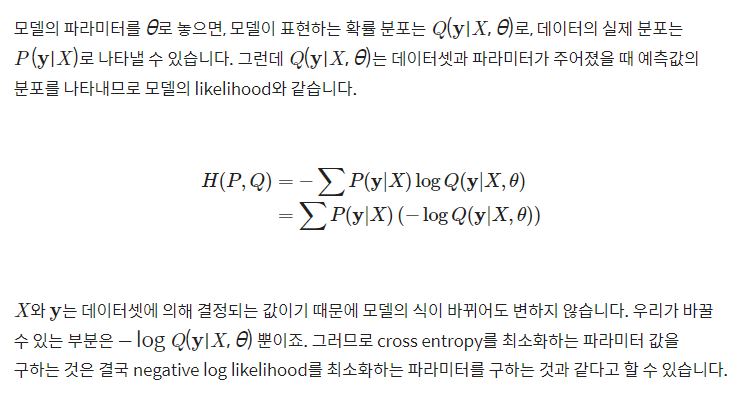

---

## 28.6 Decision Tree와 Entropy

딥러닝의 분류 모델 학습의 기초를 이루는 Cross Entropy 개념에 대해 지금까지 살펴보았습니다. 그 외에도 엔트로피 개념이 활발하게 쓰이는 분야를 하나만 더 짚어 보자면 의사결정나무(Decision Tree) 계열의 모델일 것입니다.

의사결정나무를 설명하는 가장 간단한 데이터셋을 기준으로, 잠시 의사결정나무의 원리를 설명하겠습니다. 아래 그림은 날씨에 따른 운동경기 여부를 기록한 데이터입니다. Day를 제외하고, 다음과 같은 4개의 데이터 컬럼이 있으며, Play(Yes/No) 컬럼이 라벨 역할을 하게 됩니다.

의사결정 트리는 가지고 있는 데이터에서 어떤 기준으로 전체 데이터를 나눴을 때 나누기 전보다 엔트로피가 감소하는지를 따져서, 엔트로피가 감소하면 그만큼 모델 내부에 <mark>정보 이득(Information Gain)</mark> 을 얻었다고 보는 관점입니다. 엔트로피 증가가 정보 손실량이라고 정의하는 것의 반대 관점이죠.

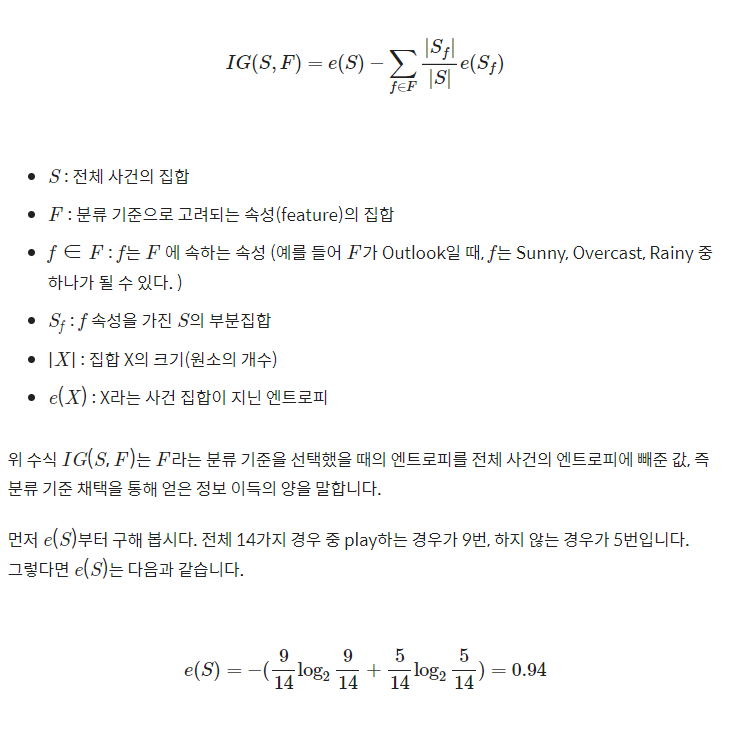

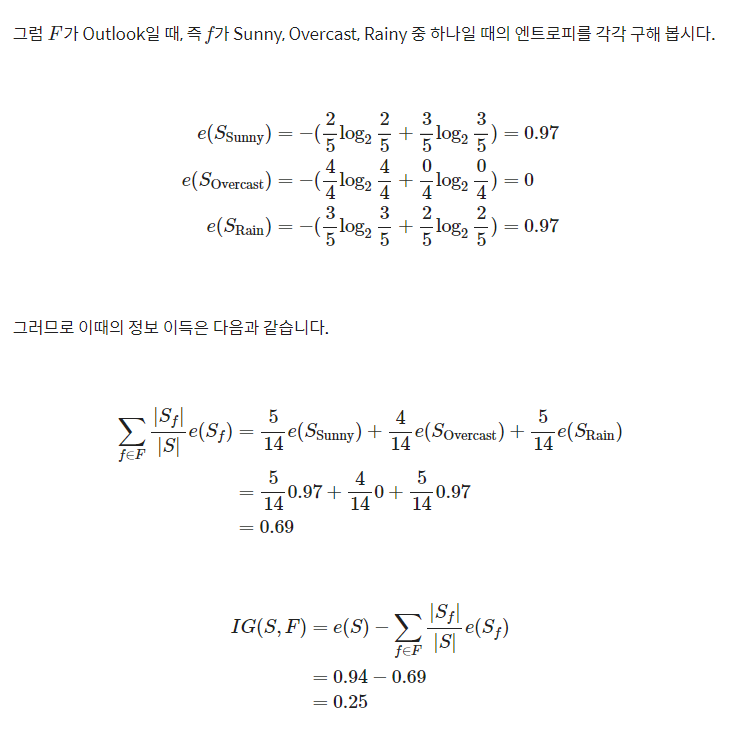

이런 방식으로 가능한 모든 분류 기준 FF에 대해 정보 이득을 계산해서, 가장 정보 이득이 큰 순서대로 전체 사건을 2등분 합니다. 그 후 다시 다른 분류 기준으로 위에서 했던 것과 동일하게, 이번에는 첫 번째로 사용했던 기준으로 나뉜 절반의 사건 집합 안에서의 정보 이득을 계산하는 방식으로 세부 분류 기준을 계속 찾아나갑니다. 그렇게 사건의 분류 기준을 세워나가다 보면 전체 사건 분류 기준이 트리 구조가 되기 때문에 이를 <mark>의사결정나무(Decision Tree) 라 부르게 됩니다.

In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [7]:
import os
csv_path = os.getenv('HOME')+'/aiffel/information_theory/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv(csv_path, header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# 데이터셋 준비
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('슝=3')

슝=3


In [9]:
# Decision Tree  모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.658008658008658


Decision Tree를 아무 제약조건 없이 학습시켜 나온 결과 정확도는 66% 정도 됩니다.
Decsion Tree의 장점은 어떻게 모델이 이런 결과를 내었는지 분류 기준을 따져보고 시각화를 통한 원인 추적이 가능하다는 점입니다. 다음과 같이 방금 학습시킨 Decision Tree 모델을 시각화해 보겠습니다.

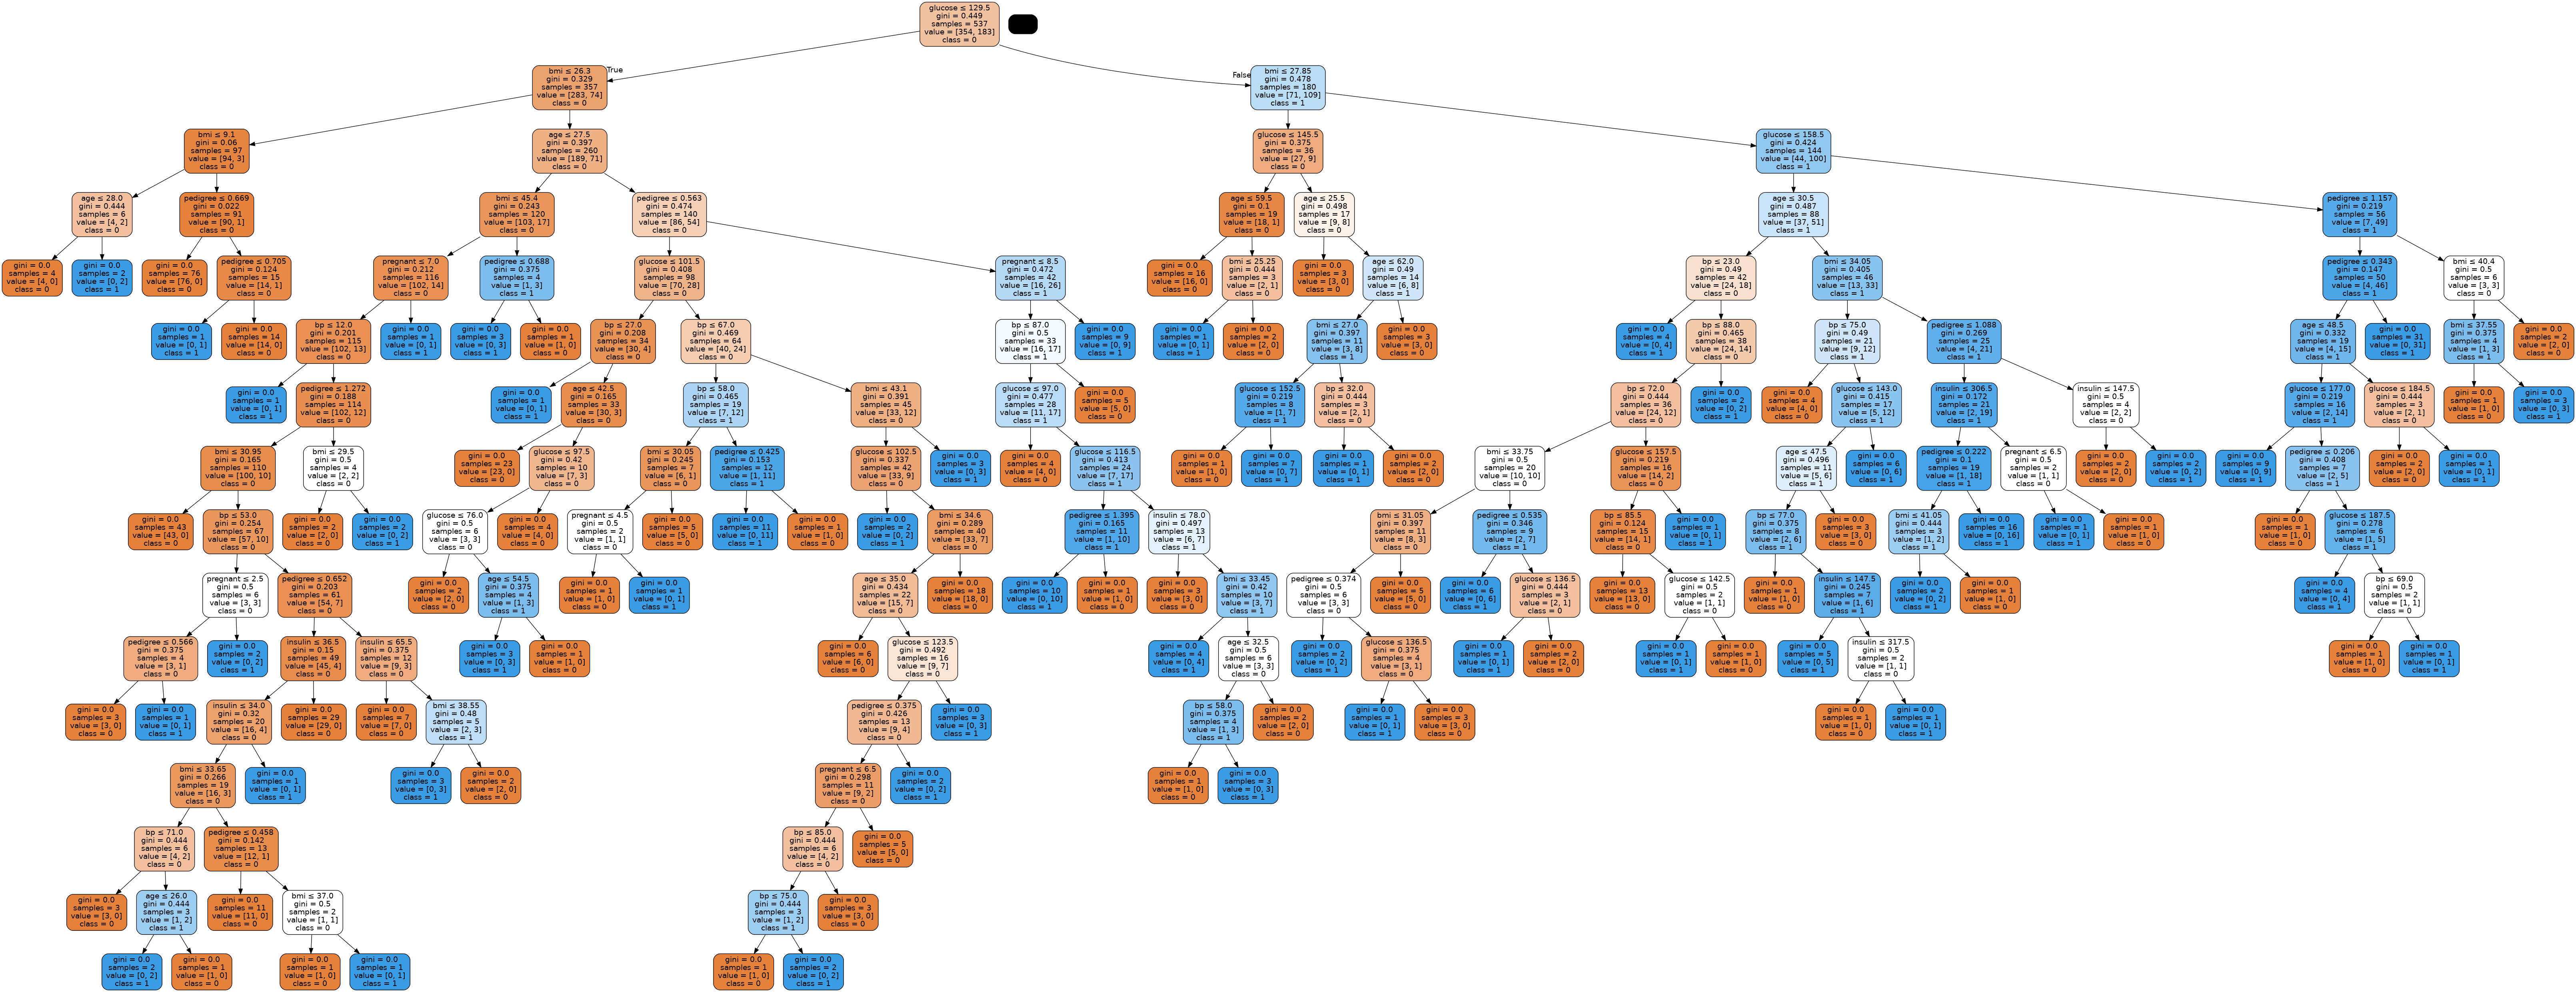

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png(), retina=True)

여기서 사용한 정보의 총량은 얼마나 될까요? 사용되지 않은 정보가 적을 수록 많은 정보를 사용한 것일 테니, 정보 이득이 되지 않은 Impurity를 측정해 봅시다.

In [11]:
# 정보 이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.15499314715839188
0.15262527466137116


비교 실험을 해 보겠습니다. 우리는 Decision Tree를 3depth 까지만 발전시켜 볼 것입니다.

In [12]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


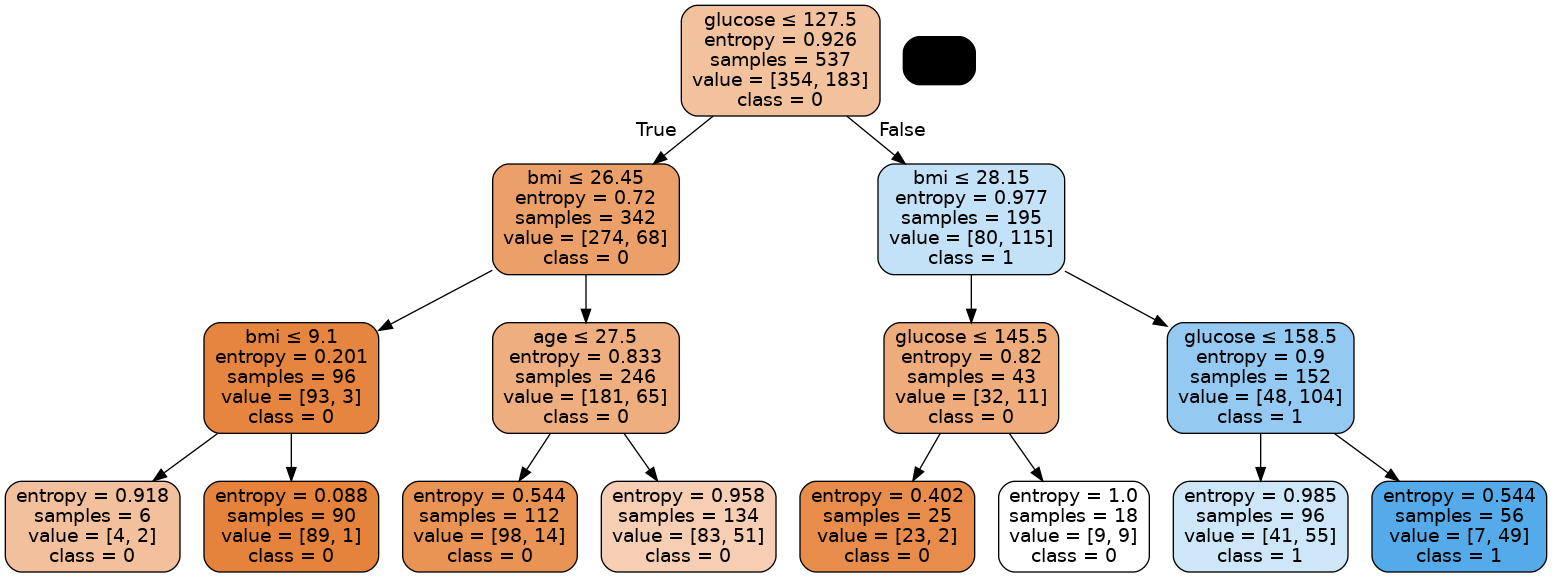

In [13]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png(), retina=True)

In [14]:
# 정보이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.7474881472739515
0.6878691771636323
